## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split

# Linear Regression

🎯 In this exercise, you will model the performance of an NBA player's win rating (`win_rating`) according to their game statistics (like minutes played, `mp`). 

❓ Load the `NBA.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [3]:
nba_df = pd.read_csv("data/NBA.csv")
nba_df

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614
...,...,...,...,...,...,...
3995,1986,1224,565,-1.761425,-0.011698,0.082828
3996,1994,3564,1785,0.907199,-0.125856,3.542416
3997,1998,706,378,0.848178,0.694183,0.787185
3998,2003,289,156,-6.298906,0.205844,-0.312601


ℹ️ You can read a detailed description of the dataset in the challenge README. Make sure to refer to it throughout the challenge.

## 1. Define Feature Set and Target

🎯 The first objective is to model the players' overall performance rating compared to peers, called *Wins Above Replacement*, (`win_rating`) against the minutes that they've played (`mp`)

❓ Assign those two variables to `X` and `y`. Remember that `X` is the feature(s), and `y` is the target.

<Axes: xlabel='mp', ylabel='win_rating'>

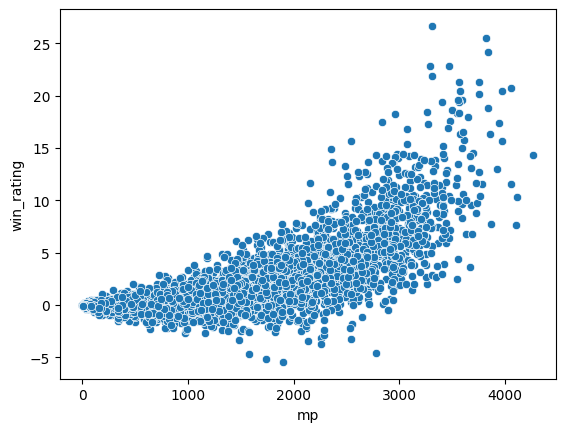

In [6]:
sns.scatterplot(data=nba_df, y="win_rating", x="mp")

👇 In a [scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html), visualize the relationship between the rating and the minutes played.

ℹ️ The scatter plot should hint that there is a relationship. But is it a perfectly linear relationship? 🤔 We'll see!

## 2. Train the Model

❓ Go ahead and train the model on the full `X` and `y` (as we've already validated the model's score, and now will use it to predict). Save the trained model under the variable `model`.

In [12]:
model=LinearRegression()
x=nba_df[["mp"]]
y=nba_df.win_rating

0        1.643091
1       10.808427
2        3.054773
3        0.230004
4        0.905614
          ...    
3995     0.082828
3996     3.542416
3997     0.787185
3998    -0.312601
3999     5.380485
Name: win_rating, Length: 4000, dtype: float64

❓ What is the slope of your trained model? It can be accessed via the model's attributes. Save the slope under a variable named `slope`.

In [16]:
model.fit(x, y)

LinearRegression()

❓ What is the intercept of your trained model? It can be accessed via the model's attributes. Save the intercept under a variable named `intercept`.

In [25]:
intercept = model.intercept_

slope= model.coef_
slope[0]

0.0026025799386401927

🤔 Make sure you understand how to interpret these coefficients before moving on.

### ☑️ Test your code

In [26]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'trained_model',
    slope = slope,
    intercept = intercept
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/yusuke/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/yusuke/code/lewagon-repo/workshop/data-linear-regression/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_trained_model.py::TestTrainedModel::test_intercept PASSED           [ 50%]
test_trained_model.py::TestTrainedModel::test_slope FAILED               [100%]

=================================== FAILURES ===================================
_________________________ TestTrainedModel.test_slope __________________________

self = <tests.test_trained_model.TestTrainedModel testMethod=test_slope>

    def test_slope(self):
>       self.assertAlmostEqual(round(self.result.slope, 3), 0.002, delta=0.001)
E       TypeError: type numpy.ndarray doesn't define __round__ method

test_trained_mod

## 3. Predict

❓ Use your trained model to predict the performance rating of a player who has played 1000 minutes in total. Save the predicted value in a variable called `prediction`.

In [34]:
new_player = pd.DataFrame({
    'mp': [1000]
})
prediction = model.predict(new_player) 
prediction

array([1.056205])

### ☑️ Test your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'prediction',
    prediction = prediction
)

result.write()
print(result.check())

## 4. Improving the Model with More Features

Your friend who enjoys the NBA fantasy league comes to you with some insights 🏀

They say that when evaluating a player's Wins Above Replacement rating, they would typically also look at the number of ball possessions (`poss`), their defense/offense ratio, and their pacing.

❓ Visualize the correlation between these new features and the `win_rating`. You can use `matplotlib` or `seaborn`. Which **one** of the above features would you consider adding to your model?

<Axes: xlabel='pacing', ylabel='win_rating'>

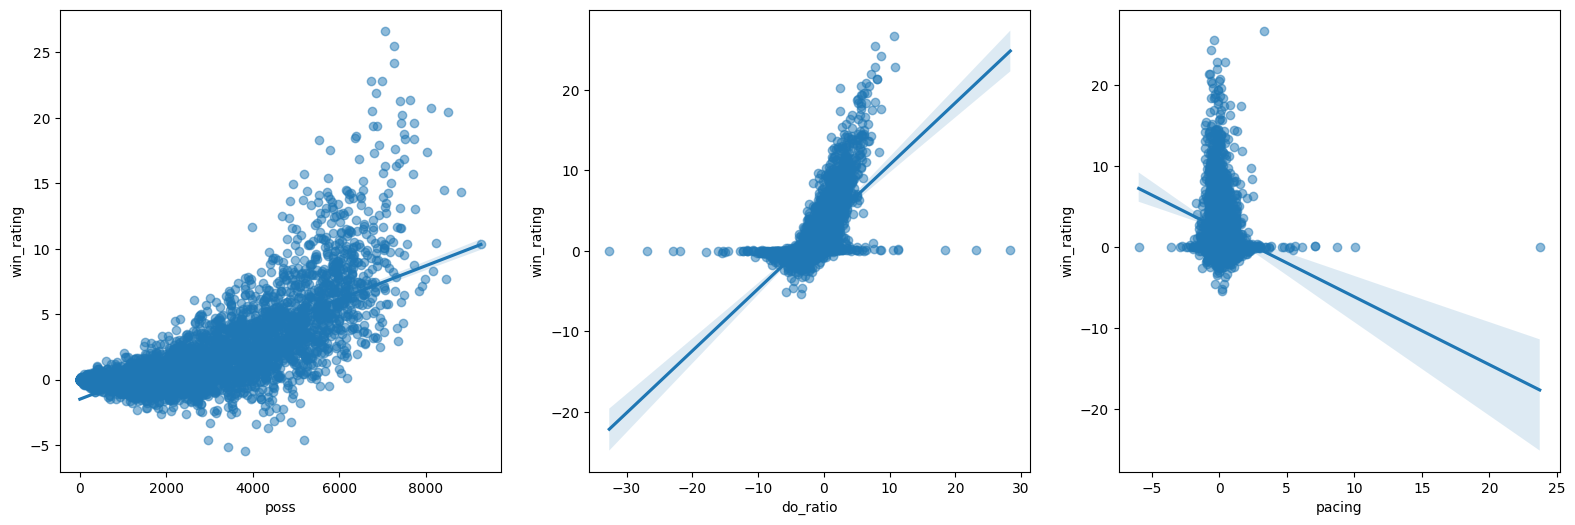

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))

plt.subplots_adjust(left=0.5, right=2)

sns.regplot(data=nba_df, y='win_rating', x='poss', ax=axes[0], scatter_kws={'alpha':0.5})
sns.regplot(data=nba_df, y='win_rating', x='do_ratio', ax=axes[1], scatter_kws={'alpha':0.5})
sns.regplot(data=nba_df, y='win_rating', x='pacing', ax=axes[2], scatter_kws={'alpha':0.5})

<details>
    <summary>💡 Click here for a hint</summary>
    A seaborn <code>regplot</code> might be very handy here.
</details>

Now let's see if the model with two features (the new one you picked and `mp`) is better at predicting a player's rating than our first model.

❓ Create a new set of features - it should be a DataFrame with two columns.

In [36]:
x2 = nba_df[["mp", "do_ratio"]]
x2

,mp,do_ratio
0,2409,-1.546275
1,2708,0.996587
2,2407,0.242598
3,585,-1.343806
4,2056,-1.813990
...,...,...
3995,565,-1.761425
3996,1785,0.907199
3997,378,0.848178
3998,156,-6.298906


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x2,y)
x_train, x_test, y_train, y_test 

(        mp  do_ratio
 1567   262 -3.923905
 392   3591  1.936504
 802   1076 -2.732567
 2810  2497  3.151217
 1826  2022  0.088453
 ...    ...       ...
 111    788 -2.739710
 2407  2668  2.218700
 3116   287 -4.004317
 1125   795  3.638971
 2259   705 -4.321434
 
 [3000 rows x 2 columns],
         mp  do_ratio
 581   3839  5.130105
 3644    76 -3.273507
 3533   673 -2.893638
 3421   186 -0.611258
 2573  2074 -1.905759
 ...    ...       ...
 1744  1979 -2.153175
 2982  2186 -1.001274
 2572  1617 -0.347180
 3524  2516  2.912451
 2735  2027  0.871235
 
 [1000 rows x 2 columns],
 1567   -0.012522
 392     9.688041
 802    -0.690750
 2810    8.506231
 1826    3.773482
           ...   
 111    -0.477098
 2407    5.412828
 3116   -0.329555
 1125    1.367285
 2259   -1.358724
 Name: win_rating, Length: 3000, dtype: float64,
 581     18.795257
 3644    -0.117105
 3533     0.407120
 3421     0.277617
 2573     0.727304
           ...    
 1744     2.339604
 2982     0.488341
 2572     1.26136

In [39]:
new_model = LinearRegression()
new_model.fit(x_train, y_train)

LinearRegression()

In [40]:
new_model.score(x_train, y_train)

0.6460567426092392

### ☑️ Test your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'improved_score',
    improved_score = mean_2_feat_score
)

result.write()
print(result.check())

You should see an **increase of around 8%** in your $R^2$ 👏

Congrats, you just performed your first manual *feature selection* - we'll see more ways to do that this week!

🤔 But is this the best we can do with Linear Regression? Let's explore more in the next challenge!

# 🏁